<a href="https://colab.research.google.com/github/dapsavoie/agricultural_satellite_classifier/blob/master/Single_image_classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import pandas as pd 
import keras 

from keras.models import load_model 
from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image

import os 

import numpy as np 

Using TensorFlow backend.


In [0]:
val_df = pd.read_csv(r'/content/drive/My Drive/agri_vision/Agriculture-Vision/val_encoded.csv')
val_df.drop(columns='Unnamed: 0', inplace=True)
#strip train index
val_df['index'] = val_df['index'].str.rstrip('.png')
val_df['index'] = val_df['index'] + '.jpg'
columns = ['cloud_shadow', 'double_planter', 'planter_skip', 'standing_water', 'waterway', 'weed_cluster']

In [0]:
model_2 = load_model('/content/drive/My Drive/agri_vision/Agriculture-Vision/adam_78.h5')

In [7]:
from PIL import Image
import numpy as np
from skimage import transform
from keras.preprocessing import image


def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (256, 256, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load('/content/drive/My Drive/agri_vision/Agriculture-Vision/test/test_rgb/1FPBNGD9F_751-8269-1263-8781.jpg')
proba = model_2.predict(image)

top_3 = np.argsort(proba[0])[:-4:-1]
classes = np.array(val_df.columns[1:])

import matplotlib.pyplot as plt

for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))

double_planter (0.824)
weed_cluster (0.0443)
standing_water (0.0193)


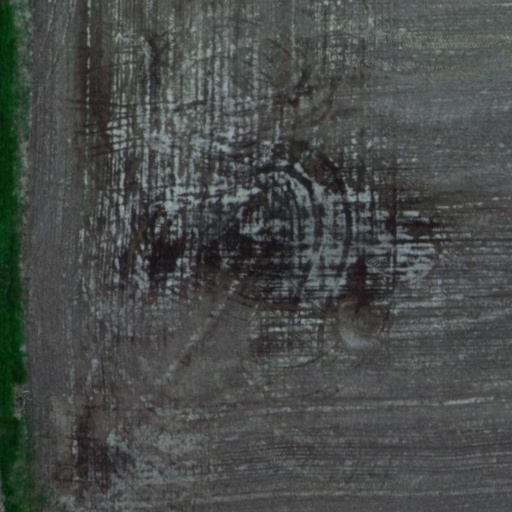

In [11]:
from keras.preprocessing import image

img = image.load_img('/content/drive/My Drive/agri_vision/Agriculture-Vision/test/test_rgb/1FPBNGD9F_751-8269-1263-8781.jpg')
img